In [6]:
!git clone https://github.com/BenediktAlkin/KappaData
!git clone https://github.com/BenediktAlkin/KappaModules
!git clone https://github.com/BenediktAlkin/KappaSchedules
!git clone https://github.com/BenediktAlkin/KappaConfig

fatal: destination path 'KappaData' already exists and is not an empty directory.
fatal: destination path 'KappaModules' already exists and is not an empty directory.
fatal: destination path 'KappaSchedules' already exists and is not an empty directory.
fatal: destination path 'KappaConfig' already exists and is not an empty directory.


In [13]:
!cd KappaData && git log --pretty=format:"%ad" --date=iso > commit_times.txt
!cd KappaModules && git log --pretty=format:"%ad" --date=iso > commit_times.txt
!cd KappaSchedules && git log --pretty=format:"%ad" --date=iso > commit_times.txt
!cd KappaConfig && git log --pretty=format:"%ad" --date=iso > commit_times.txt

In [14]:
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import numpy as np

In [17]:
def plot_num_commits_by_day_and_hour(name):
    plt.close()
    plt.clf()
    with open(f"{name}/commit_times.txt", "r", encoding="utf-8") as file:
        lines = file.readlines()
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    day_to_idx = {day: i for i, day in enumerate(weekdays)}
    heatmap_data = np.zeros((7, 24), dtype=int)
    for line in lines:
        dt = datetime.strptime(line.strip(), "%Y-%m-%d %H:%M:%S %z")
        day_idx = day_to_idx[dt.strftime("%A")]
        hour = dt.hour
        heatmap_data[day_idx][hour] += 1
    plt.figure(figsize=(12, 6))
    im = plt.imshow(heatmap_data, aspect='auto', cmap='YlGnBu', origin='upper')
    plt.xticks(ticks=np.arange(24), labels=[str(h) for h in range(24)])
    plt.yticks(ticks=np.arange(7), labels=weekdays)
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.title(name)
    plt.colorbar(im, label="Number of Commits")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

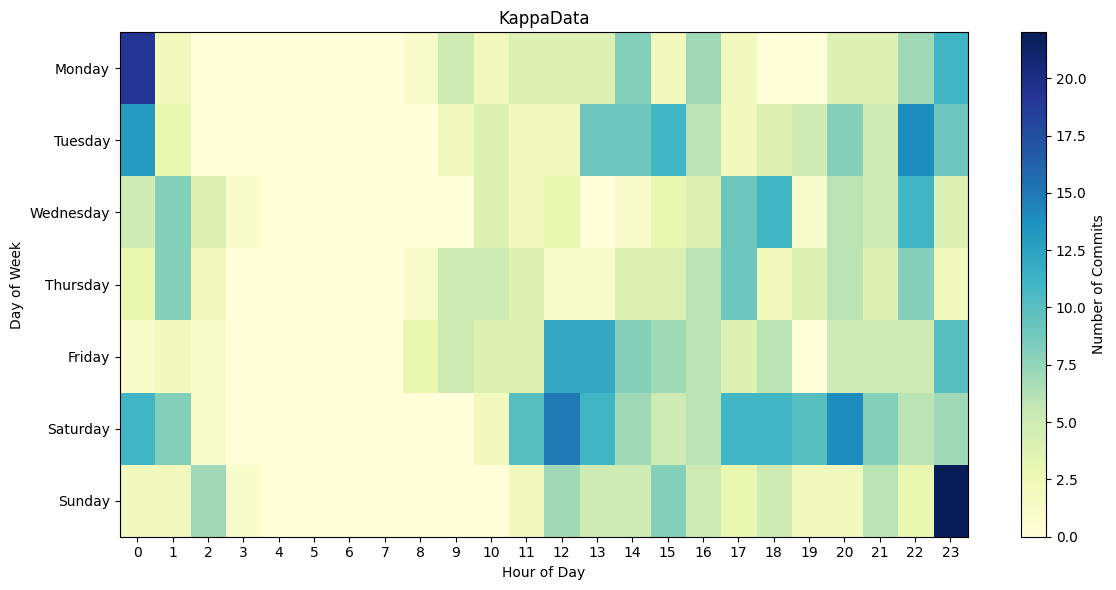

In [18]:
plot_num_commits_by_day_and_hour("KappaData")

<Figure size 640x480 with 0 Axes>

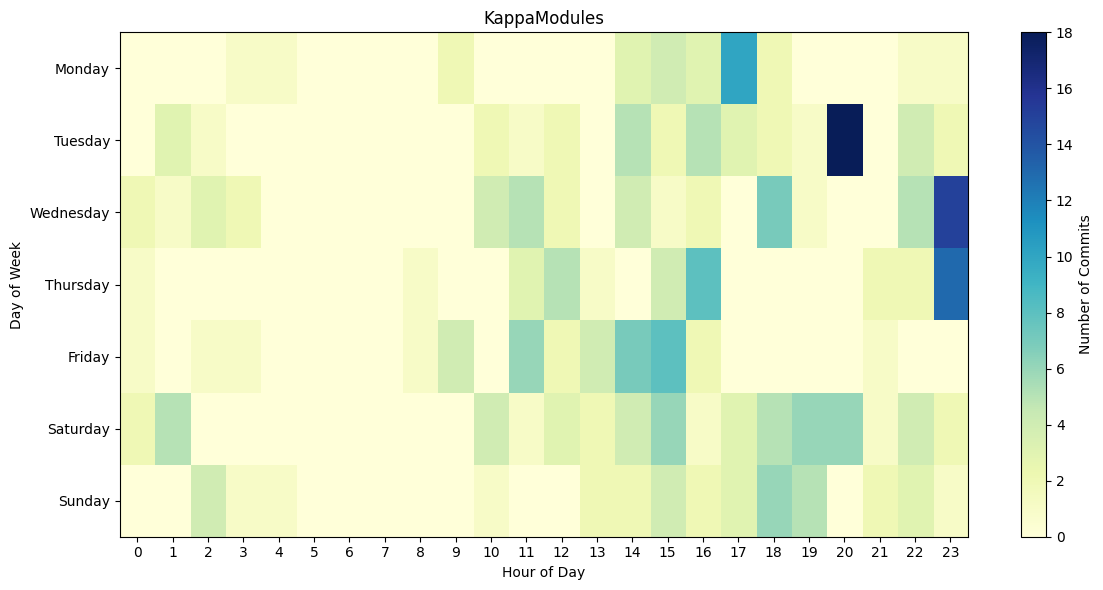

In [19]:
plot_num_commits_by_day_and_hour("KappaModules")

<Figure size 640x480 with 0 Axes>

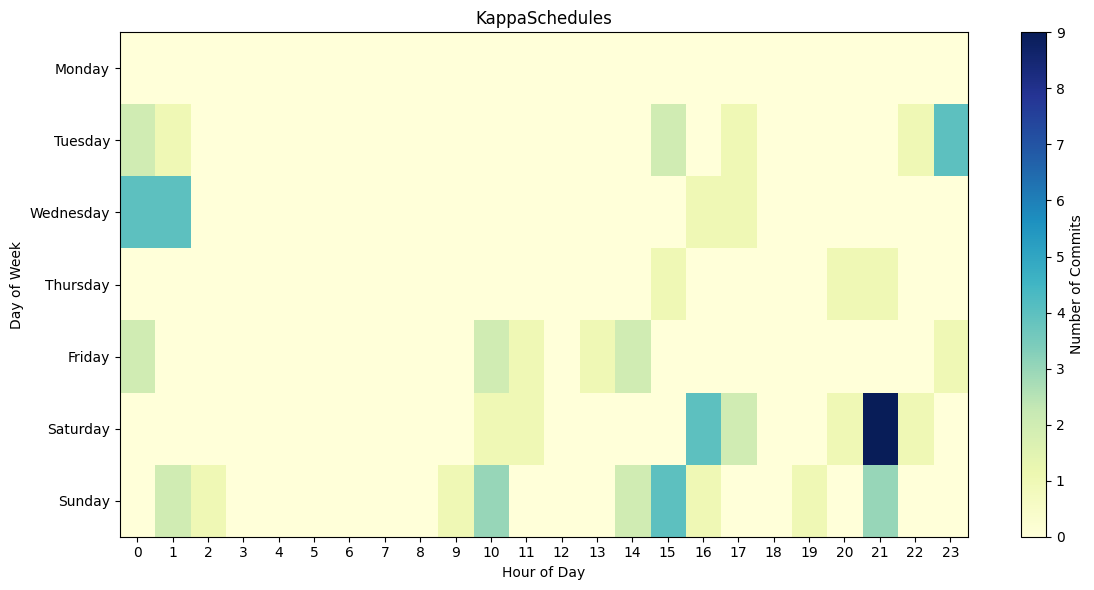

In [20]:
plot_num_commits_by_day_and_hour("KappaSchedules")

<Figure size 640x480 with 0 Axes>

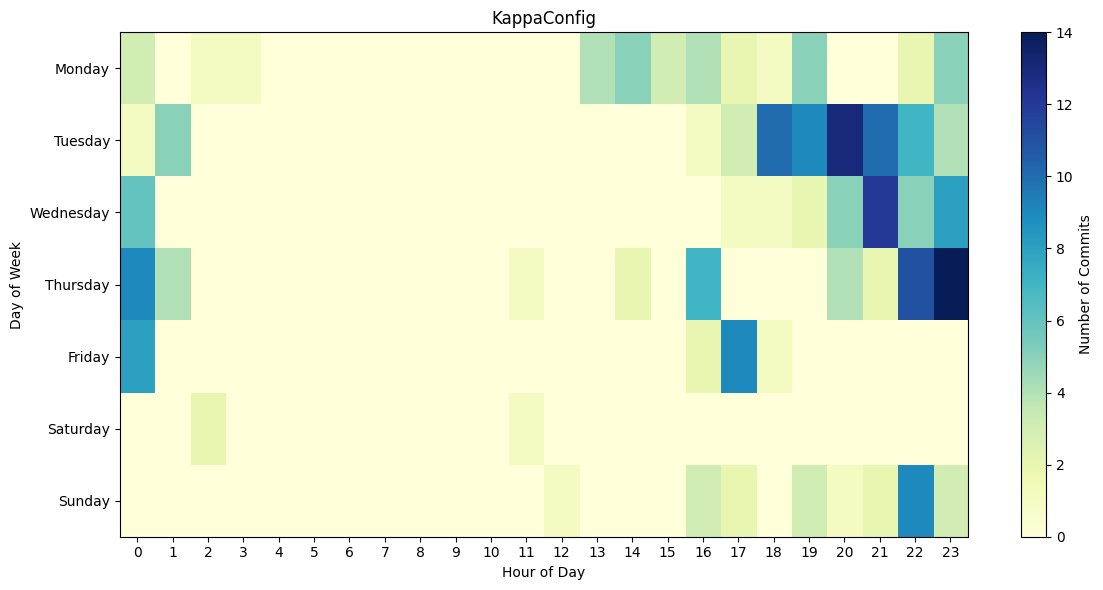

In [21]:
plot_num_commits_by_day_and_hour("KappaConfig")

In [22]:
def plot_num_commits_in_9to5(name):
    with open(f"{name}/commit_times.txt", "r", encoding="utf-8") as file:
        lines = file.readlines()
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    nine_to_five_count = 0
    day_to_idx = {day: i for i, day in enumerate(weekdays)}
    for line in lines:
        dt = datetime.strptime(line.strip(), "%Y-%m-%d %H:%M:%S %z")
        day_idx = day_to_idx[dt.strftime("%A")]
        hour = dt.hour
        if day_idx in [day_to_idx["Saturday"], day_to_idx["Sunday"]]:
            continue
        if 9 <= hour and hour <= 17:
            nine_to_five_count += 1

    print(f"total_commits: {len(lines)}")
    print(f"9to5 commits: {nine_to_five_count}")
    print(f"9to5 percent: {nine_to_five_count / len(lines) * 100:.1f}")

In [24]:
plot_num_commits_in_9to5("KappaData")

total_commits: 685
9to5 commits: 212
9to5 percent: 30.9


In [25]:
plot_num_commits_in_9to5("KappaSchedules")

total_commits: 70
9to5 commits: 12
9to5 percent: 17.1


In [26]:
plot_num_commits_in_9to5("KappaModules")

total_commits: 303
9to5 commits: 114
9to5 percent: 37.6


In [27]:
plot_num_commits_in_9to5("KappaConfig")

total_commits: 240
9to5 commits: 44
9to5 percent: 18.3
